In [15]:
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord

import SAGA as saga
from easyquery import Query


%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
s = saga.QuickStart('/mnt/extdata/saga_dropbox/', '../../sagadata/')

SAGA `shared_dir` set to /mnt/extdata/saga_dropbox/
SAGA `local_dir`  set to ../../sagadata/


In [3]:
ml = s.host_catalog.build_master_list()

ml['coord'] = SkyCoord.guess_from_table(ml, unit='deg')

/home/erik/.cache/pypoetry/virtualenvs/saga-erik-CzmBuiuX-py3.11/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 61 of "distance overridden (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [4]:
x = np.linspace(-180, 180, 1024)
galactic_equator = SkyCoord(b=[0]*len(x)*u.deg, l=x*u.deg, frame='galactic')
xover = np.where(np.diff(galactic_equator.icrs.ra.wrap_at(180*u.deg).rad)<0)[0][0]+1

galactic_equator_rolled = SkyCoord(b=np.roll(galactic_equator.b, -xover), 
                                   l=np.roll(galactic_equator.l, -xover),
                                   frame='galactic')

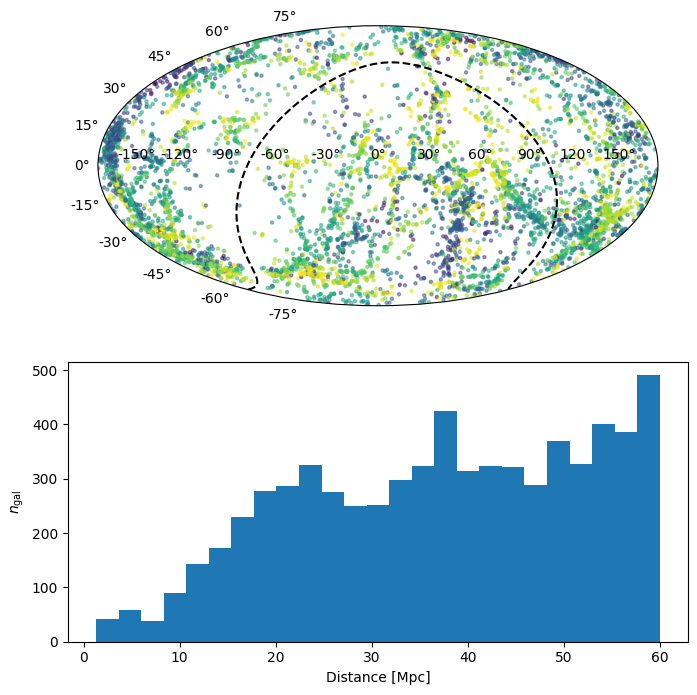

In [21]:
cat = ml

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1, projection='hammer')
ax2 = fig.add_subplot(2, 1, 2)

ax1.scatter(cat['coord'].ra.wrap_at(180*u.deg).rad, cat['coord'].dec.rad, c=cat['DIST'], s=5, alpha=.5)
ax1.plot(galactic_equator_rolled.icrs.ra.wrap_at(180*u.deg).rad, 
         galactic_equator_rolled.icrs.dec.rad, c='k',ls='--')


ax2.hist(cat['DIST'], bins=25)
ax2.set_xlabel('Distance [Mpc]')
ax2.set_ylabel(r'$n_{\rm gal}$')

plt.savefig('arrakhis_masterlist.png')

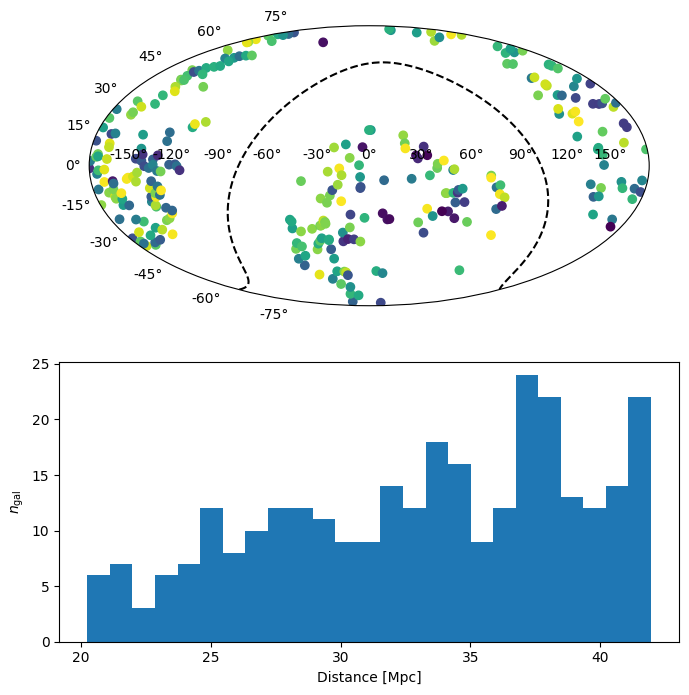

In [22]:
cat = s.host_catalog.load()

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1, projection='hammer')
ax2 = fig.add_subplot(2, 1, 2)

ax1.scatter(cat['coord'].ra.wrap_at(180*u.deg).rad, cat['coord'].dec.rad, c=cat['DIST'])
ax1.plot(galactic_equator_rolled.icrs.ra.wrap_at(180*u.deg).rad, 
         galactic_equator_rolled.icrs.dec.rad, c='k',ls='--')

ax2.hist(cat['DIST'],  bins=25)
ax2.set_xlabel('Distance [Mpc]')
ax2.set_ylabel(r'$n_{\rm gal}$')

plt.savefig('arrakhis_host_subset.png')

Now try making an expanded version of the subset that goes to 50 Mpc

In [23]:
cs = [saga.hosts.cuts.environment_allowed, saga.hosts.cuts.environment_preferred, 
      saga.hosts.cuts.mass_allowed, saga.hosts.cuts.mass_preferred]

cs.append(Query("DIST >= 20", "DIST <= 50", "V_HELIO >= 1400"))

cmsk = None
for i, c in enumerate(cs):
    msk = c.mask(ml)
    print(i, np.sum(msk), len(msk))
    if cmsk is None:
        cmsk = msk
    else:
        cmsk = cmsk & msk
    print('c', np.sum(cmsk), len(cmsk))

subd50 = ml[cmsk]

0 2279 6705
c 2279 6705
1 2130 6705
c 2130 6705
2 2525 6705
c 847 6705
3 2288 6705
c 774 6705
4 3753 6705
c 398 6705


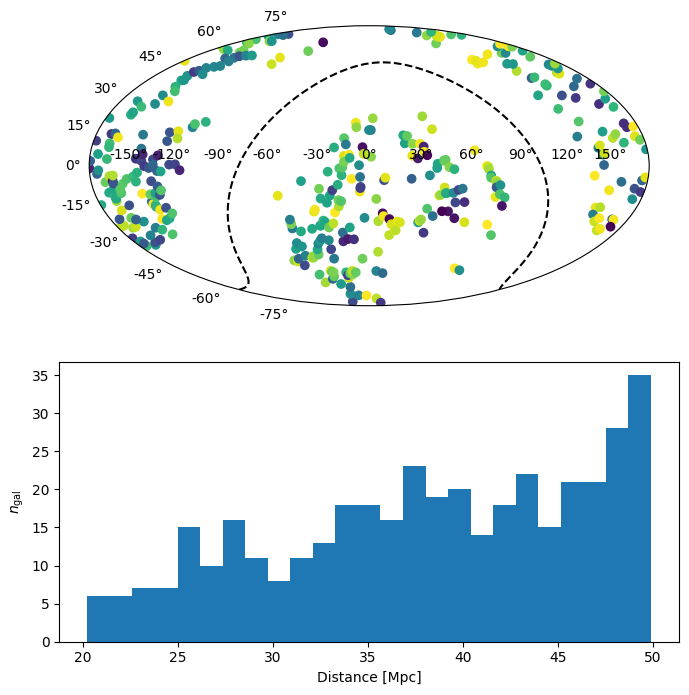

In [20]:
cat = subd50

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1, projection='hammer')
ax2 = fig.add_subplot(2, 1, 2)

ax1.scatter(cat['coord'].ra.wrap_at(180*u.deg).rad, cat['coord'].dec.rad, c=cat['DIST'])
ax1.plot(galactic_equator_rolled.icrs.ra.wrap_at(180*u.deg).rad, 
         galactic_equator_rolled.icrs.dec.rad, c='k',ls='--')

ax2.hist(cat['DIST'], bins=25)
ax2.set_xlabel('Distance [Mpc]')
ax2.set_ylabel(r'$n_{\rm gal}$')

plt.savefig('arrakhis_host_subset_d50.png')

In [30]:
towrite = subd50.copy()
towrite.remove_column('HOST_SCORE')
towrite.remove_column('HAS_IMAGE')
towrite.remove_column('REMOVED_BY_HAND')
towrite.remove_column('SAGA_NAME')
towrite.remove_column('coord')
towrite.write('arrakhis_potentialhosts_d50.ecsv', format='ascii.ecsv', overwrite=True)
towrite

HOSTID,PGC,COMMON_NAME,NSAID,NSA1ID,RA,DEC,GLON,GLAT,V_HELIO,V_VIRGO,Z_COSMO,Z_HELIO,DIST,DISTMOD,K_RAW,K_TC,K_ABS,M_HALO,SGA_ID,MORPHTYPE,BRIGHTEST_K_R1,BRIGHTEST_K_R2,BRIGHTEST_K_BG_R1,BRIGHTEST_K_BG_R2,BRIGHTEST_STAR_R1,STAR_DENSITY_R1,BRIGHTEST_STAR_R2,STAR_DENSITY_R2,COVERAGE_DECALS_DR5,COVERAGE_DECALS_DR6,COVERAGE_DECALS_DR7,COVERAGE_DECALS_DR8,COVERAGE_DECALS_DR9,COVERAGE_DES_DR1,COVERAGE_SDSS,NEAREST_MW,NEAREST_MW_DIST,NEAREST_MW_SEP,NEARBY_MW_COUNT_1,NEARBY_MW_COUNT_1.5,NEARBY_MW_COUNT_2,NEAREST_MASSIVE,NEAREST_MASSIVE_DIST,NEAREST_MASSIVE_SEP,NEARBY_MASSIVE_COUNT_1,NEARBY_MASSIVE_COUNT_1.5,NEARBY_MASSIVE_COUNT_2
str24,int64,str28,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str24,float64,float64,int64,int64,int64,str24,float64,float64,int64,int64,int64
nsa126115,279,NGC7817,126115,613769,0.995382,20.7523559,108.2284018,-40.7605243,2309.4,2379.7,0.007509265978129259,0.007703329214506124,32.35243744526626,32.549535030765725,8.4,8.413236621802978,-24.136298408962745,12.22914144595812,1359702,Sbc,99.0,99.0,99.0,10.043604377807915,7.6193,0.0,8.1267,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,nsa153017,1.7964728186633103,1.0652934562920138,0,0,1,nsa153017,1.7964728186633103,1.0652934562920138,0,0,1
nsa126133,307,NGC7820,126133,613787,1.1282910000000002,5.20025,101.8516509,-55.7390887,3064.0,3059.9,0.010335590070275581,0.010220403876871379,44.628391884512446,33.2480561899426,9.6,9.621737687431942,-23.62631850251066,11.95314144595812,766131,S0-a,99.0,99.0,9.988365960582675,11.08240783029212,99.0,0.0,8.3312,0.0,0.6056338028169014,0.0,1.0,1.0,1.0,0.176056338028169,1.0,nsa169570,4.50642154150049,4.666357007844037,0,0,0,nsa169570,4.50642154150049,4.666357007844037,0,0,0
nsa126291,660,NGC0016,126291,613943,2.2678755,27.7294444,111.5860874,-34.207158,3042.8,3142.0,0.010501893871930136,0.010149688288689371,45.3524060044614,33.28300165948812,8.766,8.787538317353402,-24.49546334213472,12.42114144595812,796386,E-S0,99.0,99.0,10.678804782029161,9.765793885813704,11.8607,0.0,6.5439,0.7386013348751098,0.0,0.0,0.0,1.0,1.0,0.0,1.0,nsa169266,8.356163346526564,10.610572930823464,0,0,0,nsa169266,8.356163346526564,10.610572930823464,0,0,0
pgc1130,1130,ESO539-005,-1,-1,4.2925515,-19.3014562,75.9912587,-78.9058906,3202.4,3076.5,0.010325886555646578,0.010682056584625623,44.586152794807106,33.246,9.964,9.977084637932911,-23.26891536206709,11.91314144595812,-1,,99.0,99.0,99.0,11.366227532096373,6.5475,2.141686005953194,4.5262,0.7138522394674862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pgc2308,9.184751327587133,7.025965549126805,0,0,0,pgc2308,9.184751327587133,7.025965549126805,0,0,0
pgc1518,1518,NGC0101,-1,-1,5.977599,-32.536217,349.088946,-81.9486821,3380.3,3197.6,0.010729749140099843,0.011275467109983135,46.34469197362877,33.33,10.192,10.192530882405665,-23.137469117594335,11.89514144595812,1120292,SABc,99.0,99.0,99.0,10.828478759580088,9.2943,0.0,8.8795,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,pgc2206,4.545670144125971,4.146637982195697,0,0,0,pgc2206,4.545670144125971,4.146637982195697,0,0,0
pgc1816,1816,ESO194-021,-1,-1,7.423635,-51.520668,311.0301163,-65.2642604,3439.0,3196.0,0.010729749140099843,0.01147126923386445,46.34469197362877,33.33,8.998,9.022693322277652,-24.307306677722345,12.44114144595812,1336457,E-S0,99.0,99.0,99.0,99.0,9.0729,0.0,7.751,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,pgc1388,3.073804236778789,3.178072824244276,0,0,0,pgc1388,3.073804236778789,3.178072824244276,0,0,0
pgc1952,1952,ESO079-003,-1,-1,8.008776000000001,-64.2533874,306.4105111,-52.7435281,2623.3,2355.9,0.007833922449166881,0.008750386909333123,33.7598104855426,32.642,9.01,9.018797428034189,-23.623202571965813,12.04514144595812,509348,SBb,11.808,99.0,11.968,99.0,9.4397,0.0,6.5878,0.4092455202544835,0.0,0.0,0.0,1.0,1.0,1.0,0.0,pgc3743,3.984681027721358,3.532546534725088,0,0,0,pgc3743,3.9846810277213